In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/dataset.zip ../

# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../dataset.zip

'Arsitektur ANN.png'
'Arsitektur LSTM.drawio'
 Classroom
'Colab Notebooks'
 dataset
 Dataset_mutia.csv
 dataset.zip
'DDoS_LSTM_Model_53 Fitur.ipynb'
 DDoS_LSTM_Model_69_Fitur_50_50.ipynb
 hasil.zip
'koding dan hasil'
'koding ta2'
'My Drive'
'Salinan DDoS_LSTM_Model_69_Fitur_50_50.ipynb'
'Untitled Diagram (1).drawio'
'Untitled Diagram.drawio'
Archive:  ../dataset.zip
   creating: dataset/
  inflating: dataset/testdata_10.csv  
  inflating: dataset/testdata_20.csv  
  inflating: dataset/testdata_30.csv  
  inflating: dataset/testdata_40.csv  
  inflating: dataset/testdata_50.csv  
  inflating: dataset/traindata_50.csv  
  inflating: dataset/traindata_60.csv  
  inflating: dataset/traindata_70.csv  
  inflating: dataset/traindata_80.csv  
  inflating: dataset/traindata_90.csv  


In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [ ]:
traindata = pd.read_csv('dataset/traindata_60.csv')
testdata = pd.read_csv('dataset/testdata_40.csv')

In [ ]:
traindata.drop(['Unnamed: 0','Timestamp'], axis = 1, inplace=True)
testdata.drop(['Unnamed: 0','Timestamp'], axis = 1, inplace=True)

In [ ]:
traindata = traindata.replace(to_replace = ["DDOS attack-HOIC"],value = 1)
traindata = traindata.replace(to_replace = ["Benign"],value = 0)
testdata = testdata.replace(to_replace = ["DDOS attack-HOIC"],value = 1)
testdata = testdata.replace(to_replace = ["Benign"],value = 0)

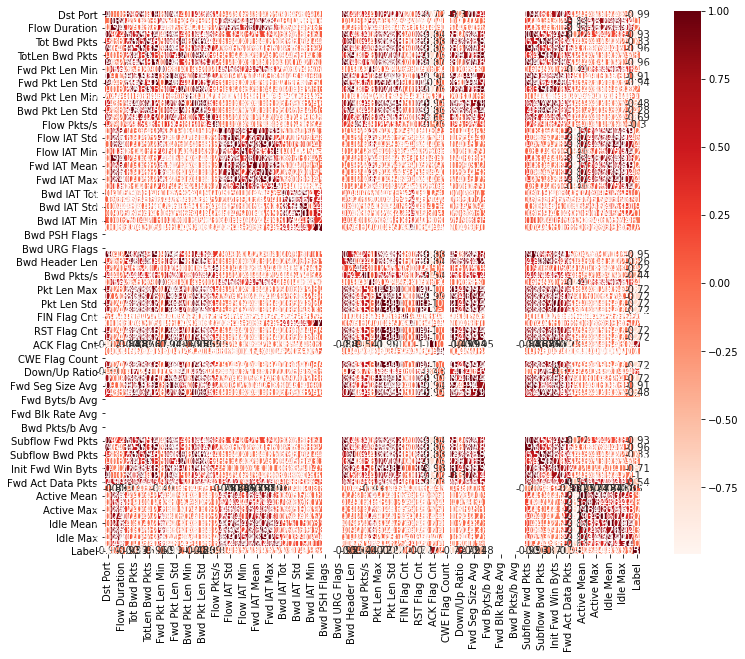

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor1 = traindata.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
a = abs(cor1['Label'])
result = a[a > 0.1]
result

Dst Port             0.990321
Tot Fwd Pkts         0.930247
Tot Bwd Pkts         0.332296
TotLen Fwd Pkts      0.963198
TotLen Bwd Pkts      0.109459
Fwd Pkt Len Max      0.964775
Fwd Pkt Len Mean     0.907723
Fwd Pkt Len Std      0.942582
Bwd Pkt Len Max      0.109320
Bwd Pkt Len Mean     0.477960
Bwd Pkt Len Std      0.279086
Flow Byts/s          0.687351
Flow Pkts/s          0.295714
Bwd IAT Min          0.115162
Fwd Header Len       0.947091
Bwd Header Len       0.255992
Fwd Pkts/s           0.221701
Bwd Pkts/s           0.443223
Pkt Len Max          0.718861
Pkt Len Mean         0.718639
Pkt Len Std          0.718073
Pkt Len Var          0.717986
RST Flag Cnt         0.717839
PSH Flag Cnt         0.718558
ACK Flag Cnt         0.723783
ECE Flag Cnt         0.717839
Down/Up Ratio        0.311444
Pkt Size Avg         0.718348
Fwd Seg Size Avg     0.907723
Bwd Seg Size Avg     0.477960
Subflow Fwd Pkts     0.930247
Subflow Fwd Byts     0.963198
Subflow Bwd Pkts     0.332296
Subflow Bw

In [ ]:
traindata.drop(['Protocol','Flow Byts/s','Flow Pkts/s','Pkt Len Min','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','FIN Flag Cnt','SYN Flag Cnt','URG Flag Cnt','CWE Flag Count','Flow Duration'], axis = 1, inplace=True)
testdata.drop(['Protocol','Flow Byts/s','Flow Pkts/s','Pkt Len Min','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','FIN Flag Cnt','SYN Flag Cnt','URG Flag Cnt','CWE Flag Count','Flow Duration'], axis = 1, inplace=True)

In [ ]:
enc = LabelEncoder()
traindata = traindata.apply(enc.fit_transform)
testdata = testdata.apply(enc.fit_transform)

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628107 entries, 0 to 628106
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Dst Port           628107 non-null  int64
 1   Tot Fwd Pkts       628107 non-null  int64
 2   Tot Bwd Pkts       628107 non-null  int64
 3   TotLen Fwd Pkts    628107 non-null  int64
 4   TotLen Bwd Pkts    628107 non-null  int64
 5   Fwd Pkt Len Max    628107 non-null  int64
 6   Fwd Pkt Len Min    628107 non-null  int64
 7   Fwd Pkt Len Mean   628107 non-null  int64
 8   Fwd Pkt Len Std    628107 non-null  int64
 9   Bwd Pkt Len Max    628107 non-null  int64
 10  Bwd Pkt Len Min    628107 non-null  int64
 11  Bwd Pkt Len Mean   628107 non-null  int64
 12  Bwd Pkt Len Std    628107 non-null  int64
 13  Flow IAT Mean      628107 non-null  int64
 14  Flow IAT Std       628107 non-null  int64
 15  Flow IAT Max       628107 non-null  int64
 16  Flow IAT Min       628107 non-null  in

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628107 entries, 0 to 628106
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Dst Port           628107 non-null  int64
 1   Tot Fwd Pkts       628107 non-null  int64
 2   Tot Bwd Pkts       628107 non-null  int64
 3   TotLen Fwd Pkts    628107 non-null  int64
 4   TotLen Bwd Pkts    628107 non-null  int64
 5   Fwd Pkt Len Max    628107 non-null  int64
 6   Fwd Pkt Len Min    628107 non-null  int64
 7   Fwd Pkt Len Mean   628107 non-null  int64
 8   Fwd Pkt Len Std    628107 non-null  int64
 9   Bwd Pkt Len Max    628107 non-null  int64
 10  Bwd Pkt Len Min    628107 non-null  int64
 11  Bwd Pkt Len Mean   628107 non-null  int64
 12  Bwd Pkt Len Std    628107 non-null  int64
 13  Flow IAT Mean      628107 non-null  int64
 14  Flow IAT Std       628107 non-null  int64
 15  Flow IAT Max       628107 non-null  int64
 16  Flow IAT Min       628107 non-null  in

In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418737 entries, 0 to 418736
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Dst Port           418737 non-null  int64
 1   Tot Fwd Pkts       418737 non-null  int64
 2   Tot Bwd Pkts       418737 non-null  int64
 3   TotLen Fwd Pkts    418737 non-null  int64
 4   TotLen Bwd Pkts    418737 non-null  int64
 5   Fwd Pkt Len Max    418737 non-null  int64
 6   Fwd Pkt Len Min    418737 non-null  int64
 7   Fwd Pkt Len Mean   418737 non-null  int64
 8   Fwd Pkt Len Std    418737 non-null  int64
 9   Bwd Pkt Len Max    418737 non-null  int64
 10  Bwd Pkt Len Min    418737 non-null  int64
 11  Bwd Pkt Len Mean   418737 non-null  int64
 12  Bwd Pkt Len Std    418737 non-null  int64
 13  Flow IAT Mean      418737 non-null  int64
 14  Flow IAT Std       418737 non-null  int64
 15  Flow IAT Max       418737 non-null  int64
 16  Flow IAT Min       418737 non-null  in

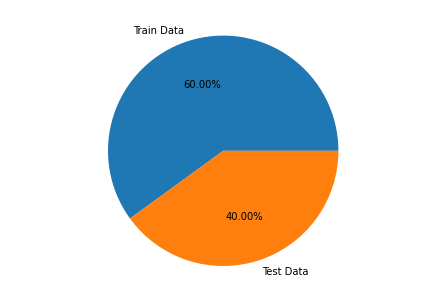

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Train Data','Test Data']
Label = [628107,418738]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
traindata.groupby('Label')['Label'].count()

Label
0    216891
1    411216
Name: Label, dtype: int64

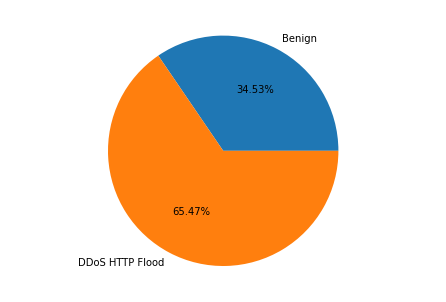

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [217233,411912]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
testdata.groupby('Label')['Label'].count()

Label
0    143941
1    274796
Name: Label, dtype: int64

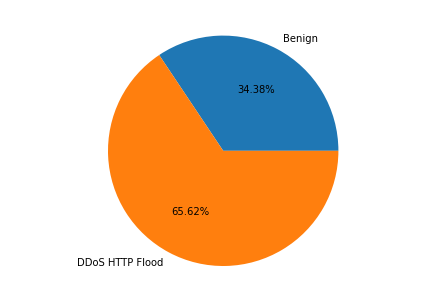

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [143600,274099]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

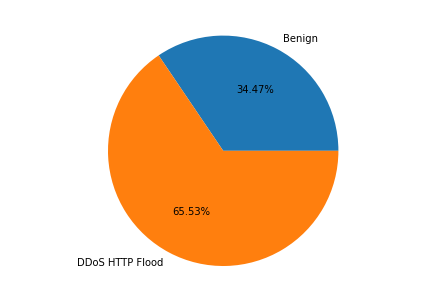

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [360833,686012]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
X = traindata.iloc[:, 0:53]
Y = traindata.iloc[:, 54]
C = testdata.iloc[:, 54]
T = testdata.iloc[:, 0:53]

In [ ]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

In [ ]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [ ]:
y_train = np.array(Y)
y_test = np.array(C)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))

In [ ]:
print(X_train.shape)

(628107, 1, 53)


In [ ]:
batch_size = 64

In [ ]:
model = Sequential()
model.add(LSTM(16,input_dim=53, return_sequences=True,activation='tanh'))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(LSTM(8, return_sequences=False, activation='tanh'))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, None, 53), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, None, 53), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 16, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropou

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 16)          4480      
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 5,289
Trainable params: 5,289
Non-trainable params: 0
______________________________________________________

In [ ]:
import keras
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
lstm_model = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test),callbacks=[csv_logger])
model.save("kddresults/lstm/fullmodel/lstm_model.hdf5")

Epoch 1/100
9815/9815 [==============================] - 47s 4ms/step - loss: 0.6621 - accuracy: 0.6568 - val_loss: 0.6398 - val_accuracy: 0.6562
Epoch 2/100
9815/9815 [==============================] - 42s 4ms/step - loss: 0.6406 - accuracy: 0.6534 - val_loss: 0.6368 - val_accuracy: 0.6562
Epoch 3/100
9815/9815 [==============================] - 44s 4ms/step - loss: 0.6369 - accuracy: 0.6543 - val_loss: 0.6330 - val_accuracy: 0.6562
Epoch 4/100
9815/9815 [==============================] - 44s 4ms/step - loss: 0.6323 - accuracy: 0.6545 - val_loss: 0.6270 - val_accuracy: 0.6562
Epoch 5/100
9815/9815 [==============================] - 43s 4ms/step - loss: 0.6251 - accuracy: 0.6547 - val_loss: 0.6171 - val_accuracy: 0.6562
Epoch 6/100
9815/9815 [==============================] - 41s 4ms/step - loss: 0.6133 - accuracy: 0.6542 - val_loss: 0.5994 - val_accuracy: 0.6562
Epoch 7/100
9815/9815 [==============================] - 41s 4ms/step - loss: 0.5918 - accuracy: 0.6540 - val_loss: 0.5665 -

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.4f, Accuracy: %.4f%%" % (loss, accuracy*100))
lstm_predict = model.predict_classes(X_test)

13086/13086 [==============================] - 19s 1ms/step - loss: 0.0034 - accuracy: 0.9997

Loss: 0.0034, Accuracy: 99.9678%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


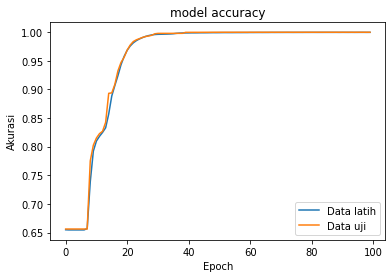

In [ ]:
plt.plot(lstm_model.history['accuracy'])
plt.plot(lstm_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='lower right')
plt.show()

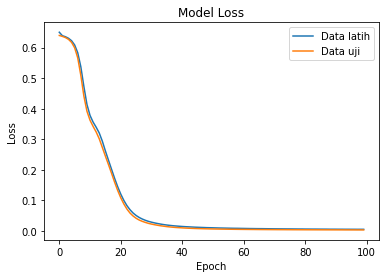

In [ ]:
plt.plot(lstm_model.history['loss'])
plt.plot(lstm_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='upper right')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, lstm_predict)
print(cm)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

[[143813    128]
 [     7 274789]]


In [ ]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [ ]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9991107467642992
recall :  0.99995132804895
F1 :  0.9995308606795222
sensitivity :  0.99995132804895
akurasi :  0.9996776019315227


<function matplotlib.pyplot.show>

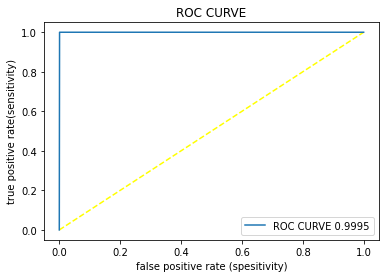

In [ ]:
import keras
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fpr_keras,tpr_keras, threshold =roc_curve(y_test, lstm_predict)
auc=auc(fpr_keras,tpr_keras)

plt.figure(1)
plt.plot([0,1],[0,1],'k--',color='yellow')
plt.plot(fpr_keras, tpr_keras, label="ROC CURVE {0:.4f}".format(auc))
plt.xlabel('false positive rate (spesitivity)')
plt.ylabel('true positive rate(sensitivity)')
plt.title('ROC CURVE')
plt.legend(loc='best')
plt.show

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, lstm_predict)

print('Average precision-recall score: {0:0.8f}'.format(
      average_precision))

Average precision-recall score: 0.99952566


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99952566')

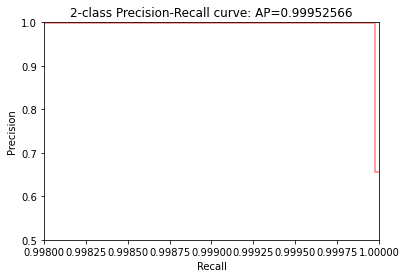

In [ ]:
from inspect import signature
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, lstm_predict)
average_precision = average_precision_score(y_test, lstm_predict)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.5, where='post')
plt.fill_between(recall, precision, alpha=0.5, color='w', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5000, 1.0000])
plt.xlim([0.9980, 1.0000])
plt.title('2-class Precision-Recall curve: AP={0:0.8f}'.format(average_precision))

In [ ]:
lstm_predict

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
import pandas as pd
import numpy as np
lstm_predict.shape

(418737, 1)

In [ ]:
type(lstm_predict)

numpy.ndarray

In [ ]:
dataset = pd.DataFrame()
dataset['lstm_predict'] = lstm_predict.tolist()

In [ ]:
dataset.head()

,lstm_predict
0,[0]
1,[0]
2,[1]
3,[0]
4,[1]


In [ ]:
hasil = pd.concat([testdata,dataset], axis=1)

In [ ]:
hasil.head(20)

,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
0,4065,4,2,76,38,65,0,69,71,37,0,43,38,623,55263,582,6,1062,637,44711,887,7,680,1504,0,680,729,0,0,0,0,22,4,64297,34946,9,59,58,58,1,1,0,1,0,81,69,43,4,76,2,38,33,17,1,0,[0]
1,4701,4,2,76,24,65,0,69,71,23,0,28,24,17177,184165,17139,6,17773,15617,130207,17500,7,16987,30532,0,17090,13804,0,0,0,0,22,4,41193,9286,9,44,43,43,1,1,0,1,0,65,69,28,4,76,2,24,33,17,1,0,[0]
2,3,1,0,0,0,0,0,0,0,0,0,0,0,5472,0,871,833,825,3453,0,879,1002,0,0,0,0,0,0,0,0,0,6,0,62323,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]
3,857,4,2,76,7,65,0,69,71,6,0,10,7,15000,166600,15062,5,15594,13441,115564,15348,6,14910,28338,0,15017,11737,0,0,0,0,22,4,44624,11881,9,24,23,23,1,1,0,1,0,45,69,10,4,76,2,7,33,17,1,0,[0]
4,3,1,0,0,0,0,0,0,0,0,0,0,0,20885,0,3548,3510,3502,12487,0,3556,3679,0,0,0,0,0,0,0,0,0,6,0,52817,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]
5,3,1,0,0,0,0,0,0,0,0,0,0,0,31938,0,7563,7523,7517,23909,0,7571,7692,0,0,0,0,0,0,0,0,0,6,0,39164,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]
6,3,1,0,0,0,0,0,0,0,0,0,0,0,35939,0,10250,10183,10204,29543,0,10258,10352,0,0,0,0,0,0,0,0,0,6,0,32521,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]
7,3,2,4,13,52,11,0,12,11,52,0,60,59,469,9463,409,4,665,1110,271,417,274,1047,423,1329,817,24,0,0,0,0,12,7,63474,36294,9,26,25,25,1,1,0,1,1,47,12,60,2,13,4,52,33,4,1,1,[1]
8,3,1,0,0,0,0,0,0,0,0,0,0,0,10314,0,1685,1647,1639,6436,0,1693,1816,0,0,0,0,0,0,0,0,0,6,0,59315,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]
9,3,1,0,0,0,0,0,0,0,0,0,0,0,13856,0,2283,2245,2237,8634,0,2291,2414,0,0,0,0,0,0,0,0,0,6,0,57382,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,[1]


In [ ]:
hasil.to_csv(r'validasi_60_40.csv')

In [ ]:
hasil = pd.read_csv('validasi_60_40.csv')

In [ ]:
data = hasil.replace(to_replace = ["[1]"],value = 1)
data = data.replace(to_replace = ["[0]"],value = 0)

In [ ]:
data.head(20)

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
0,0,4065,4,2,76,38,65,0,69,71,37,0,43,38,623,55263,582,6,1062,637,44711,887,7,680,1504,0,680,729,0,0,0,0,22,4,64297,34946,9,59,58,58,1,1,0,1,0,81,69,43,4,76,2,38,33,17,1,0,0
1,1,4701,4,2,76,24,65,0,69,71,23,0,28,24,17177,184165,17139,6,17773,15617,130207,17500,7,16987,30532,0,17090,13804,0,0,0,0,22,4,41193,9286,9,44,43,43,1,1,0,1,0,65,69,28,4,76,2,24,33,17,1,0,0
2,2,3,1,0,0,0,0,0,0,0,0,0,0,0,5472,0,871,833,825,3453,0,879,1002,0,0,0,0,0,0,0,0,0,6,0,62323,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1
3,3,857,4,2,76,7,65,0,69,71,6,0,10,7,15000,166600,15062,5,15594,13441,115564,15348,6,14910,28338,0,15017,11737,0,0,0,0,22,4,44624,11881,9,24,23,23,1,1,0,1,0,45,69,10,4,76,2,7,33,17,1,0,0
4,4,3,1,0,0,0,0,0,0,0,0,0,0,0,20885,0,3548,3510,3502,12487,0,3556,3679,0,0,0,0,0,0,0,0,0,6,0,52817,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1
5,5,3,1,0,0,0,0,0,0,0,0,0,0,0,31938,0,7563,7523,7517,23909,0,7571,7692,0,0,0,0,0,0,0,0,0,6,0,39164,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1
6,6,3,1,0,0,0,0,0,0,0,0,0,0,0,35939,0,10250,10183,10204,29543,0,10258,10352,0,0,0,0,0,0,0,0,0,6,0,32521,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1
7,7,3,2,4,13,52,11,0,12,11,52,0,60,59,469,9463,409,4,665,1110,271,417,274,1047,423,1329,817,24,0,0,0,0,12,7,63474,36294,9,26,25,25,1,1,0,1,1,47,12,60,2,13,4,52,33,4,1,1,1
8,8,3,1,0,0,0,0,0,0,0,0,0,0,0,10314,0,1685,1647,1639,6436,0,1693,1816,0,0,0,0,0,0,0,0,0,6,0,59315,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1
9,9,3,1,0,0,0,0,0,0,0,0,0,0,0,13856,0,2283,2245,2237,8634,0,2291,2414,0,0,0,0,0,0,0,0,0,6,0,57382,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,1,1


In [ ]:
data_attack = data[data["Label"]==1]
data_normal = data[data["Label"]==0]

In [ ]:
attack_error = data_attack[data_attack.loc[:,"Label"] != data_attack.loc[:,"lstm_predict"]]
normal_error = data_normal[data_normal.loc[:,"Label"] != data_normal.loc[:,"lstm_predict"]]

In [ ]:
attack_error

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
115632,115632,3,2,4,35,52,32,0,37,34,52,0,60,59,597,76606,709,6,796,1372,57787,724,101,1173,549,4544,941,26,0,0,0,0,12,7,63132,36166,9,47,46,46,1,1,0,1,1,68,37,60,2,35,4,52,33,4,1,1,0
131400,131400,3,2,4,11,52,9,0,10,9,52,0,60,59,406,34815,421,3,397,574,8771,436,15,982,358,49,538,22,0,0,0,0,12,7,63642,36357,9,24,23,23,1,1,0,1,1,45,10,60,2,11,4,52,33,4,1,1,0
255741,255741,3,2,4,17,52,14,0,17,15,52,0,60,59,910,85850,679,2,670,1120,67483,695,29,1485,861,1121,809,18,0,0,0,0,12,7,62299,35853,9,29,28,28,1,1,0,1,1,50,17,60,2,17,4,52,33,4,1,1,0
296109,296109,3,2,4,15,52,12,0,15,13,52,0,60,59,747,1296,270,2,448,676,93,222,252,1327,703,3,595,291,0,0,0,0,12,7,62732,36016,9,27,26,26,1,1,0,1,1,48,15,60,2,15,4,52,33,4,1,1,0
371088,371088,3,2,4,21,52,18,0,21,20,52,0,60,59,684,89127,914,1,874,1528,76137,926,2,1263,639,6729,1022,27,0,0,0,0,12,7,62900,36079,9,33,32,32,1,1,0,1,1,54,21,60,2,21,4,52,33,4,1,1,0
377570,377570,3,2,4,61,52,57,0,63,64,52,0,60,59,1781,88674,815,1,1044,1867,46907,823,247,2363,1676,2392,1199,297,0,0,0,0,12,7,60086,35038,9,72,71,71,1,1,0,1,1,93,63,60,2,61,4,52,33,4,1,1,0
409920,409920,3,2,4,43,52,40,0,46,45,52,0,60,59,907,6211,379,1,598,976,283,387,237,1488,864,26,749,333,0,0,0,0,12,7,62307,35856,9,55,54,54,1,1,0,1,1,77,46,60,2,43,4,52,33,4,1,1,0


In [ ]:
normal_error.head(20)

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
46,46,1,4,4,1,53,1,0,1,1,53,0,61,62,56154,202719,35785,3,35786,51420,148584,35545,4,31004,38849,64452,27937,610,0,0,0,0,28,11,832,49,10,11,17,17,0,1,0,0,0,32,1,61,4,1,4,53,25,2,1,0,1
1421,1421,28,0,1,0,0,0,0,0,0,0,0,0,0,16,0,16,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2,65056,36481,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,16,1,0,0,1
2489,2489,5,0,1,2,3,3,2,6,0,3,2,7,0,56165,0,35767,30284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,833,60,3,7,0,0,0,0,0,0,1,29,6,7,0,2,1,3,0,0,0,0,1
5544,5544,1,0,1,0,0,0,0,0,0,0,0,0,0,56192,0,35797,30287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,818,36,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,5,8,0,0,1
6846,6846,4667,1,0,89,0,66,5,74,0,0,0,0,0,56203,0,35823,30729,35815,51456,0,35578,30923,0,0,0,0,0,1,0,0,0,6,0,792,0,10,81,0,0,0,0,1,0,0,105,74,0,1,89,0,0,3,0,1,0,1
16031,16031,1,12,9,82,55,62,0,24,49,53,0,56,55,41835,200656,35297,2,35780,49493,145595,35445,6,31000,36262,64444,27930,38,0,0,0,0,38,17,998,82,10,17,15,15,0,1,0,0,0,38,24,56,12,82,9,55,20,7,7,0,1
19275,19275,23,1,1,0,0,0,0,0,0,0,0,0,0,56078,202718,35776,9,35773,51417,0,35536,30462,0,0,0,0,0,0,0,0,0,6,2,841,52,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,11,1,0,0,1
24034,24034,0,2,0,0,0,0,0,0,0,0,0,0,0,56718,4,35900,31021,35893,51972,18,35655,31215,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1
26325,26325,26,1,1,0,0,0,0,0,0,0,0,0,0,39315,201633,26582,17,26499,46286,0,26458,25338,0,0,0,0,0,0,0,0,0,6,2,6363,241,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,11,1,0,0,1
27746,27746,31,1,1,0,0,0,0,0,0,0,0,0,0,55929,202713,35771,19,35769,51413,0,35531,30458,0,0,0,0,0,0,0,0,0,6,2,845,56,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,11,1,0,0,1
